In [1]:
%pylab inline
#Import code from previous videos:
from partFive import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import optimize

In [3]:
class trainer(object):
    #Local reference to network:
    def __init__(self, N):
        self.N = N

    def callBackFunction(self, parameters):
        self.N.setParams(parameters)
        self.J.append(self.N.costFunction(self.I, self.j))

    def costFunctionWrapper(self, parameters, I, j):
        self.N.setParams(parameters)
        cost = self.N.costFunction(I, j)
        grad = self.N.computeGradients(I, j)
        return cost, grad

    def train(self, I ,j):
        self.I = I
        self.j = j

        self.J = []

        parameters0 = self.N.getParams()
        options = {'maxiter':200, 'disp':True}
        result = optimize.minimize(self.costFunctionWrapper, parameters0, jac=True, method='BFGS',
                                args =(I, j), options=options, callback=self.callBackFunction)

        self.N.setParams(result.x)
        self.optimizeResults = result


In [4]:
NN = NeuralNetwork()

In [5]:
T = trainer(NN)

In [6]:
T.train(I,j)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 54
         Gradient evaluations: 54


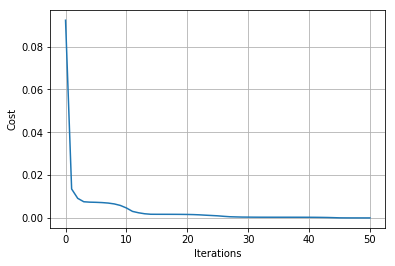

In [8]:
plot(T.J)
grid(2)
xlabel('Iterations')
ylabel('Cost')

In [9]:
NN.costFunctionPrime(I,j)

(array([[  4.13137324e-07,   5.72483565e-07,  -1.05178689e-07],
        [  2.96060590e-07,   2.56139133e-07,  -3.37614378e-07]]),
 array([[ -2.81167237e-07],
        [ -1.44416695e-07],
        [ -5.29161708e-07]]))

In [10]:
NN.forward(I)

array([[ 0.74999875],
       [ 0.81999801],
       [ 0.92999737]])

In [11]:
j

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [12]:
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [13]:
allOutputs = NN.forward(allInputs)

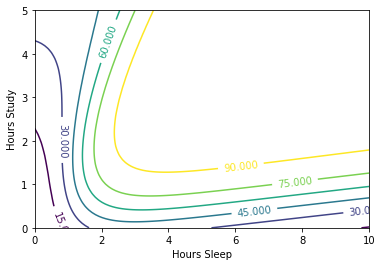

In [14]:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

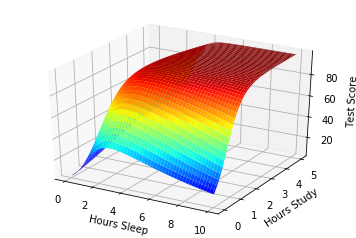

In [15]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')